# Examination of the NLT package
**N**atural **L**anguage **T**ol**k**it is a famous Pythonic library devoted for various kinds of researches conducted on the language as opposed to _spaCy_ that deals with production-ready enterprise solutions. In tis notebook I will investigate its strengths and make a conclusion what it is great for.

In [29]:
import nltk # Natural Language Toolkit
import nltk.corpus as nlc # Natural Language Corpus
import os #For file illustrations
import nltk.tokenize as nlt # Natural Language Tokeniser
nltk.download('all') # Download all the corpora
with open("relations.txt") as f:
    source = f.read()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloadi

# Word processing
## Tokenisation
NLTK does a great job at tokenisating the text stream into tokens, such as words and punctuation marks. In a way, it is similar to `str.split()` but extracting the special characters like commas, dots, quotation marks as well. Because of this, NLTK tokenisation is much more lightweight than the spaCy implementation, but it is also in a way inaccurate by treating possessive _'s_ as a different lexeme from the base word as shown in the example below.

In [30]:
lexemes = nlt.word_tokenize(source)
print(lexemes[:30])

['The', 'United', 'States', 'officially', 'recognized', 'the', 'independence', 'of', 'Ukraine', 'on', 'December', '25', ',', '1991', '.', 'The', 'United', 'States', 'upgraded', 'its', 'consulate', 'in', 'the', 'capital', ',', 'Kyiv', ',', 'to', 'embassy', 'status']


## Stopword filtering
In natural languages we often deal with conjugative words that do not convey any meaning on their own but are enforced by the grammar rules. They impose a spam overhead for text processing, consequently the NLTK researches have concluded it is beneficial to register all of those junk words into a list and filter them out from the text to not spend additional time and resources to perform further analysis on them as well.

In [31]:
#View the list of the English stopwords.
print(list(nlc.stopwords.words('english'))[:20])
print("\n")
#Remove the stopwords from the source text.
conwords = [lex for lex in lexemes if lex not in nlc.stopwords.words('english')]
print(conwords[:30])
print("\n")
print(lexemes[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


['The', 'United', 'States', 'officially', 'recognized', 'independence', 'Ukraine', 'December', '25', ',', '1991', '.', 'The', 'United', 'States', 'upgraded', 'consulate', 'capital', ',', 'Kyiv', ',', 'embassy', 'status', 'January', '21', ',', '1992', '.', 'In', '2002']


['The', 'United', 'States', 'officially', 'recognized', 'the', 'independence', 'of', 'Ukraine', 'on', 'December', '25', ',', '1991', '.', 'The', 'United', 'States', 'upgraded', 'its', 'consulate', 'in', 'the', 'capital', ',', 'Kyiv', ',', 'to', 'embassy', 'status']


From the example above we see the *continue words* (as opposed to the stopwords) removed a verity of words from the original, including: *of*, *on*, *t*, *the*, etc. Notice it did not remove the indefinite article **the** from the name of the geopolitical entity. 

## Stemming and lemmasation
In natural language processing, extracting the base form of the word is one of the frequent tasks as it often deals with grammar conversions and word formulations. NLTK offers two ways to do it: **stemming** and **lemmasation**.  

Stemming is a way to extract the base algorithmically by analysing the word's structure and removing any affixes and inflections. This is why it's a lightweight solution, yet it is unable to deal with irregular words that are in the realm of exceptions. For those cases, _lemmasation_ offers a dictionary where all words are grouped around their lemma, and the whole task comes down to traversing a map. This solution is obviously more accurate if this is what the task demands.

In [32]:
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("caged"))   #Correct: cage
print(stemmer.stem("beloved")) #False: belov
lemmatizer = nltk.stem.WordNetLemmatizer()
print(lemmatizer.lemmatize("caged"))   #Correct: cage
print(lemmatizer.lemmatize("beloved")) #Correct: beloved

cage
belov
caged
beloved


## Part of speech tagging
Identifying the part of speech of the words is also a frequent task in natural language understanding that NLTK handles just fine. It represents parts of speech as string tag encapsulated into a list of tuples with their respective words.  

Parts of speech are linguistic abbreviations that not just convey the part of speech but also additional syntactic information. The list of tags it identifies support:
1. **DT** determiner;
2. **CD** coordinate conjunction;
3. **CD** cardinal digit;
4. **FW** foreign word;
5. **IN** preposition/subordination conjunction;
6. **JJ** large adjective;
7. **JJR** comparative adjective;
8. **JJS** superlative adjective;
9. **LS** list market;
10. **NN** singular noun;
11. **NNS** plural noun;
12. **NNP** proper singular noun;
13. **NNPS** proper plural noun;
14. **POS** possesive ending;
15. **PRP** personal pronouns, etc...

In [33]:
tags = nltk.pos_tag(lexemes)
print(tags[:30])
#Documentation about each tag and examples can be printed at need:
print(nltk.help.upenn_tagset('RB'))
print(nltk.help.upenn_tagset('VBN'))

[('The', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('officially', 'RB'), ('recognized', 'VBN'), ('the', 'DT'), ('independence', 'NN'), ('of', 'IN'), ('Ukraine', 'NNP'), ('on', 'IN'), ('December', 'NNP'), ('25', 'CD'), (',', ','), ('1991', 'CD'), ('.', '.'), ('The', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('upgraded', 'VBD'), ('its', 'PRP$'), ('consulate', 'NN'), ('in', 'IN'), ('the', 'DT'), ('capital', 'NN'), (',', ','), ('Kyiv', 'NNP'), (',', ','), ('to', 'TO'), ('embassy', 'VB'), ('status', 'NN')]
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
None
VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
None


## Chunking 
**Chunking** is the process of grouping individual tokens into larger related groups that can be applied together, such as in question answering, similarly to what spaCy does with spans. 

In [34]:
tree = nltk.ne_chunk(tags)
print(tree)

(S
  The/DT
  (GPE United/NNP States/NNPS)
  officially/RB
  recognized/VBN
  the/DT
  independence/NN
  of/IN
  (GPE Ukraine/NNP)
  on/IN
  December/NNP
  25/CD
  ,/,
  1991/CD
  ./.
  The/DT
  (GPE United/NNP States/NNPS)
  upgraded/VBD
  its/PRP$
  consulate/NN
  in/IN
  the/DT
  capital/NN
  ,/,
  (PERSON Kyiv/NNP)
  ,/,
  to/TO
  embassy/VB
  status/NN
  on/IN
  January/NNP
  21/CD
  ,/,
  1992/CD
  ./.
  In/IN
  2002/CD
  ,/,
  relations/NNS
  between/IN
  the/DT
  (GPE United/NNP States/NNPS)
  and/CC
  (PERSON Ukraine/NNP)
  deteriorated/VBD
  after/IN
  one/CD
  of/IN
  the/DT
  recordings/NNS
  made/VBN
  during/IN
  the/DT
  (ORGANIZATION Cassette/NNP Scandal/NNP)
  revealed/VBD
  an/DT
  alleged/VBN
  transfer/NN
  of/IN
  a/DT
  sophisticated/JJ
  (GPE Ukrainian/JJ)
  defense/NN
  system/NN
  to/TO
  (PERSON Saddam/NNP Hussein/NNP)
  's/POS
  (GPE Iraq/NNP)
  ./.
  Following/VBG
  the/DT
  2014/CD
  annexation/NN
  of/IN
  (GPE Crimea/NNP)
  by/IN
  the/DT
  (GPE Russian/J

# Named Entity Recognition
NER is a one of the most widespread technology in NLP used everywhere, and NLTK offers a way to print named entities from the text. It can then furthermore be used for sentiment analysis, pattern matching and other tasks.   

From what we see above, the `ne_chunk()` function already recognises the entities in the text when chunking them, however if we wanted to get a list of spans and the entity tag, there's no such function and we need to implement it ourselves.

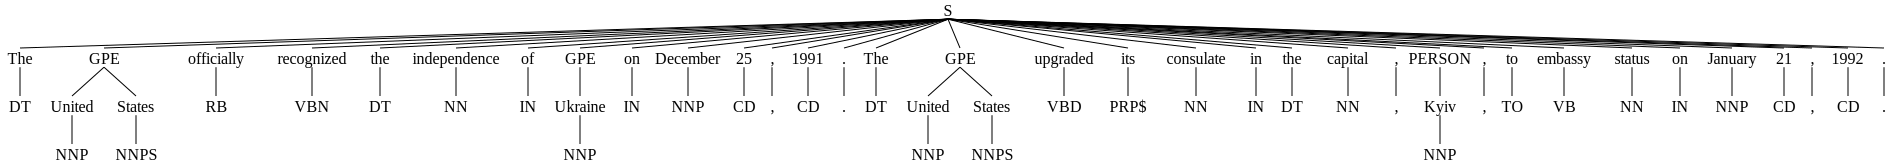

In [37]:
nltk.ne_chunk(tags[:36])

In [40]:
#Implementing the Named Entity Tagging (NET) algorithm.
def net(lexemes: list[str]) -> list[tuple[str]]:
    """Searches the lexemes for named entities and returns a 
    list of tuples containing the named entity and its type."""
    tags = nltk.pos_tag(lexemes)
    tree = nltk.ne_chunk(tags)
    return [(subtree[0][0], subtree.label()) for subtree in tree
                if isinstance(subtree, nltk.tree.Tree)]

print(net(lexemes)[:30])

[('United', 'GPE'), ('Ukraine', 'GPE'), ('United', 'GPE'), ('Kyiv', 'PERSON'), ('United', 'GPE'), ('Ukraine', 'PERSON'), ('Cassette', 'ORGANIZATION'), ('Ukrainian', 'GPE'), ('Saddam', 'PERSON'), ('Iraq', 'GPE'), ('Crimea', 'GPE'), ('Russian', 'GPE'), ('USA', 'ORGANIZATION'), ('Ukraine', 'GPE'), ('United', 'GPE'), ('Ukraine', 'GPE'), ('Bridget', 'PERSON'), ('Brink', 'PERSON'), ('Ukrainian', 'GPE'), ('United', 'GPE'), ('Oksana', 'PERSON'), ('United', 'GPE'), ('Ukraine', 'PERSON'), ('NATO', 'ORGANIZATION'), ('United', 'GPE'), ('American', 'GPE'), ('Ukrainian', 'GPE'), ('U.S.', 'GPE'), ('Global', 'PERSON'), ('Ukrainians', 'GPE')]


We can see clearly the NER algorithm is rather based on machine learning because it makes certain obvious mistakes, such as categorising Kyiv, the capital of Ukraine, as a person, or USA as an organisation instead of geopolitical entity. On top of that, it returns only the first word from a compound phrase, which makes *United* a GPE on its own.

# Conclusions 
NLTK is naturally built for researching purposes and does not provide as much robustness as its analogue, spaCy does. It primarily processes the text in a C-like text fashion completely omitting any details about parts of speech, spans or properties but instead finds those out in the process of calling specialised functions for that. On top of that, NLTK is completely built on the algorithmic analysis and does not use any kind of machine learning, even though it comes with rich corpora.   

With that being said, I consider Natural Language Toolkit to be suitable for minor linguistic researches and spontaneous scripts, and would prefer to use Spacy for any other kind of language processing.
# Sources and references
1. POS Tagging with NLTK and Chunking in NLP: _https://www.guru99.com/pos-tagging-chunking-nltk.html_
